# Data science and business analytics intern at The Sparks foundation

## Name- Ashutosh Tiwari

### TASK2- Prediction using unsupervised ML

#### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually. 


In [1]:
#importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# reading the dataset

df=pd.read_csv('Iris.csv')
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


#### Data exploration

In [32]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [33]:
df.shape

(150, 6)

In [34]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [35]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

#### Data Cleaning

In [36]:
df.drop(columns=["Id","Species"], inplace= True, axis=1)
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


### Univariate plotting

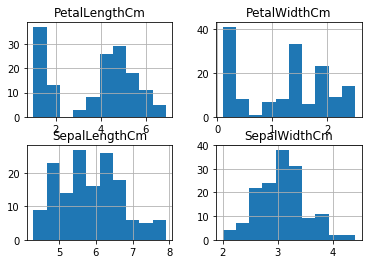

In [86]:
df.hist()
plt.show()

#### Elbow method for 

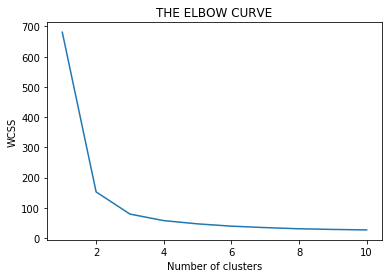

In [87]:
#importing KMeans from sklearn.cluster

from sklearn.cluster import KMeans

x=df.iloc[:, [0,1,2,3]].values
wcss=[]  # within cluster sum of squares

for i in range(1,11):
    kmeans=KMeans(n_clusters= i, max_iter=300, init='k-means++', n_init=10, random_state=10)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)  # intertia_ == WCSS ( within cluster sum of squares)

# plotting the elbow curve

plt.plot(range(1,11), wcss) # we cannot take range(10 as the cluster will not be counted as 0th cluster)
plt.title("THE ELBOW CURVE")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### From the above graph we can see that the value of elbow is 3. Hence we will take 3 as the total number of clusters.
### Value of K=3

#### This value of K signifies that the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

In [88]:
kmeans=KMeans( n_clusters=3 ,max_iter=300 , init='k-means++', n_init=10, random_state=10)
y_kmeans= kmeans.fit_predict(x)
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [89]:
kmeans.cluster_centers_    #finding the center mean values of the clusters

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

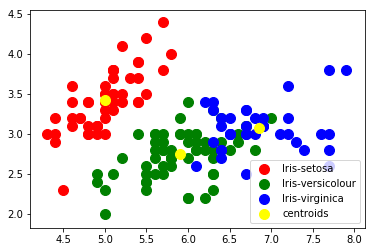

In [90]:
# visualising the clusters

plt.scatter(x[y_kmeans== 0, 0], x[y_kmeans== 0, 1], s=100, c='red', label='Iris-setosa')
plt.scatter(x[y_kmeans== 1, 0], x[y_kmeans== 1, 1], s=100, c='green', label='Iris-versicolour')
plt.scatter(x[y_kmeans== 2, 0], x[y_kmeans== 2, 1], s=100, c='blue', label='Iris-virginica')

#plotting the centers of the clusters

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='centroids')
plt.legend()